**BUSINESS PROBLEM**

Company plans to buy aeroplanes for private and commercial enterprises to diversify their business.

We need to find the lowest risk aircraft using historical accident data.


Objective
1. Understand the dataset and clean it
2. Calculate fatality rates per aircraft model
3. Recommend 3 low risk aircraft
4. Visualization

In [9]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
df=pd.read_csv("Aviation_Data.csv", low_memory=False)

In [10]:
#Show structure and first rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
display(df.head())

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


***CLEAN AND PREPARE DATA**

1. Standarize column name(replace spaces/dots with underscores)
2. Rename model: Aircraft_Model, Event.Date : date
3. Convert injury columns to numberic and fill missing values with 0
4. Read the dates as actual dates rather than texts

In [14]:
#CLean column names
df.columns = (
    df.columns
      .str.strip()                          # remove leading/trailing spaces
      .str.replace(' ', '_', regex=False)   # replace spaces with underscores
      .str.replace('.', '_', regex=False)   # replace literal dots with underscores
)
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [22]:
#Rename columns
df=df.rename(columns={'Model':'Aircraft_Model', 'Event_Date':'Date'})
df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,UNK,Cruise,Probable Cause,NaN,1948,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3,0,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1,2,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3


In [23]:
#Injury columns
injury_cols = ["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"]

df[injury_cols] = df[injury_cols].apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)

df["Total_Injuries"] = df[injury_cols].sum(axis=1)

df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,UNK,Cruise,Probable Cause,NaN,1948,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3,0,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1,2,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3


In [24]:
# Convert Date column to actual datetime, coerce invalid dates to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with no valid Date, make a copy to avoid SettingWithCopyWarning
df = df.dropna(subset=['Date']).copy()

# Extract year from Date
df['Year'] = df['Date'].dt.year


accidents_per_year = df.groupby('Year')['Accident_Number'].nunique().reset_index()

df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,UNK,Cruise,Probable Cause,NaN,1948,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3,0,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1,2,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3


## 3. Calculate Fatality Rate and Rank Models
We define:
- Total Occupants = Fatal + Serious + Minor + Uninjured  
- Fatality Rate = Fatalities ÷ Total Occupants 
We then group by aircraft model and keep only models with at least 5 accidents.

In [25]:
# 2. Calculate Total Occupants
df["Total_Occupants"] = df[injury_cols].sum(axis=1)
df.head()


,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries,Total_Occupants
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,0,UNK,Cruise,Probable Cause,NaN,1948,2,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2,2
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,2,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3,3


In [26]:
# Calculate Fatality Rate (avoid divide-by-zero)
df["Fatality_Rate"] = df["Total_Fatal_Injuries"] / df["Total_Occupants"]
df["Fatality_Rate"] = df["Fatality_Rate"].fillna(0)
df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries,Total_Occupants,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Cruise,Probable Cause,NaN,1948,2,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3,3,0.333333


In [27]:
# Group by model
risk = (df.groupby('Aircraft_Model')
          .agg(Accident_Count=('Aircraft_Model','count'),
               Total_Fatalities=('Total_Fatal_Injuries','sum'),
               Total_Injuries=('Total_Injuries','sum')))
risk['Fatality_Rate'] = risk['Total_Fatalities'] / risk['Total_Injuries']
df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries,Total_Occupants,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Cruise,Probable Cause,NaN,1948,2,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3,3,0.333333


In [28]:
# Filter for stable stats
risk = risk.query('Total_Injuries > 0 and Accident_Count >= 5')
df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries,Total_Occupants,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Cruise,Probable Cause,NaN,1948,2,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3,3,0.333333


In [83]:
# Top 10 lowest risk (includes zero-fatality models)
lowest_risk = risk.sort_values('Fatality_Rate').head(10)
df.head(10)

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Total_Injuries,Year,Total_Occupants,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Cruise,Probable Cause,NaN,2,1948,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Unknown,Probable Cause,19-09-1996,4,1962,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,26-02-2007,3,1974,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,12-09-2000,2,1977,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0,0,VMC,Approach,Probable Cause,16-04-1980,3,1979,3,0.333333
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,1,44,VMC,Climb,Probable Cause,19-09-2017,45,1979,45,0.000000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Unknown,Probable Cause,06-11-2001,4,1981,4,1.000000
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0,2,VMC,Takeoff,Probable Cause,01-01-1982,2,1982,2,0.000000
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0,2,IMC,Landing,Probable Cause,01-01-1982,2,1982,2,0.000000
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,3,0,IMC,Cruise,Probable Cause,01-01-1982,3,1982,3,0.000000


In [29]:
# Top 10 lowest *non-zero* fatality rates (for plotting)
lowest_risk_nonzero = risk[risk['Fatality_Rate'] > 0].sort_values('Fatality_Rate').head(10)
df.head()

,Event_Id,Investigation_Type,Accident_Number,Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,Total_Injuries,Total_Occupants,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Cruise,Probable Cause,NaN,1948,2,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,UNK,Unknown,Probable Cause,19-09-1996,1962,4,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,26-02-2007,1974,3,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977,2,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0,0,VMC,Approach,Probable Cause,16-04-1980,1979,3,3,0.333333


**4. Visual Analysis**


We will plot:

Accident trends over time
Top 10 aircraft models by accident count
Top 10 lowest non-zero fatality rates

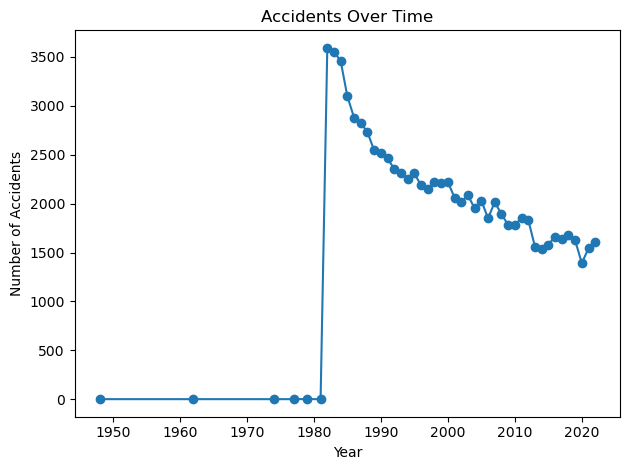

In [30]:
# 1. Accident trends
df.groupby('Year').size().plot(kind='line', marker='o', title='Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

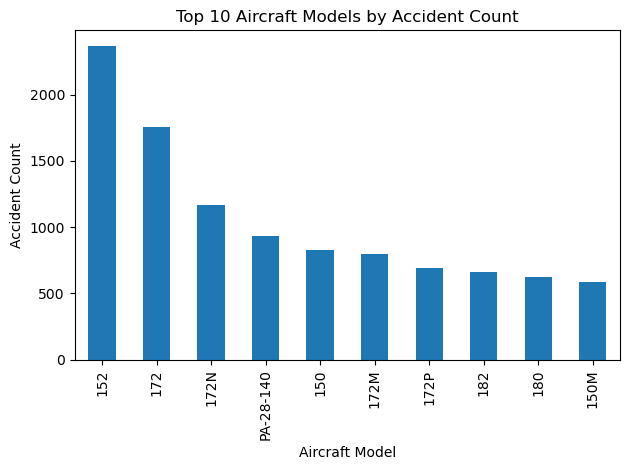

In [86]:
# 2. Top models by accident count
df['Aircraft_Model'].value_counts().head(10).plot(kind='bar', title='Top 10 Aircraft Models by Accident Count')
plt.xlabel('Aircraft Model')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

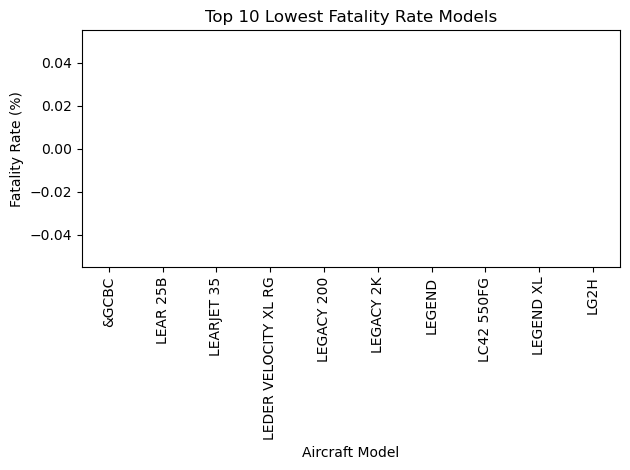

In [31]:
# 3) Lowest fatality rate models 
rate = (
    df.groupby('Aircraft_Model')[['Total_Fatal_Injuries','Total_Injuries']]
      .sum()
      .assign(Fatality_Rate=lambda x: (x['Total_Fatal_Injuries'] / x['Total_Injuries'])
                                     .replace([np.inf, -np.inf], 0))
      ['Fatality_Rate']
      .fillna(0)
      .sort_values(ascending=True)
      .head(10)
)

(rate * 100).plot(kind='bar', title='Top 10 Lowest Fatality Rate Models', ylabel='Fatality Rate (%)')
plt.xlabel('Aircraft Model')
plt.tight_layout()
plt.show()

In [32]:
df.to_csv("cleaned_aviation_data.csv", index=False)
print("Clean CSV saved as cleaned_aviation_data.csv")

Clean CSV saved as cleaned_aviation_data.csv
